In [49]:
import sys
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [50]:
sys.path.append("../inference") # go to parent dir
sys.path.append("../utils") # go to parent dir
from voting import rrv_captions

In [100]:
def unigram_precision(s, t):
    """
    Computes the unigram precision between s and t.
    Note: this is not necessarily symmetric as s and t might have different lengths.
    :param s: sentence 1 as a list of words
    :param t: sentence 2 as a list of words
    :return: The unigram precision
    """
    
    s = s.split()
    t = t.split()

    if len(s) == 0 or len(t) == 0:
        return 0

    # Don't take into account multiplicity
    t = set(t)

    overlap = 0
    for w in s:
        overlap += 1 if w in t else 0
    return overlap / len(s)

In [101]:
def print_image(image_id, image_dir = "../../val2014_2/val2014/"):
    image_path = "{}{}.jpg".format(image_dir, image_id)
    img=mpimg.imread(image_path)
    imgplot = plt.imshow(img)

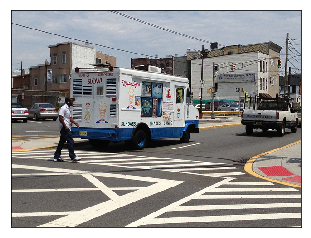

In [115]:
print_image(2)
plt.xticks([])
plt.yticks([])
plt.show()

In [117]:
captions = [
    "an ice cream van driving past the street",
    "a man crossing the street",
    "a man crossing the street behind an ice cream van"
]
N = len(captions)
scores = [0.4, 0.3, 0.01]

In [118]:
votes = np.array([[unigram_precision(captions[i], captions[j]) for j in range(N)] for i in range(N)])
print(votes)

[[1.   0.25 0.75]
 [0.4  1.   1.  ]
 [0.6  0.5  1.  ]]


In [119]:
election_results = [sum([scores[i] * unigram_precision(captions[i], captions[j]) for i in range(len(captions))]) for j in range(len(captions))]
print(election_results)

[0.526, 0.405, 0.6100000000000001]


In [59]:
unigram_precision("An ice cream van driving past", "A")

0.034482758620689655

In [69]:
print(unigram_overlap("man", "woman"))
print(unigram_precision("man", "woman"))

['man']
['woman']
0.0
1.0
